# Encoder-Decoder Analysis

### Model Architecture

In [1]:
report_file = '/Users/bking/IdeaProjects/LanguageModelRNN/experiment_results/encdec_noing10_bow_200_512_04drb/encdec_noing10_bow_200_512_04drb.json'
log_file = '/Users/bking/IdeaProjects/LanguageModelRNN/experiment_results/encdec_noing10_bow_200_512_04drb/encdec_noing10_bow_200_512_04drb_logs.json'

import json
import matplotlib.pyplot as plt
with open(report_file) as f:
    report = json.loads(f.read())
with open(log_file) as f:
    logs = json.loads(f.read())
print'Encoder: \n\n', report['architecture']['encoder']
print'Decoder: \n\n', report['architecture']['decoder']

Encoder: 

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> output]
  (1): nn.LookupTable
  (2): nn.Mean
  (3): nn.Linear(200 -> 512)
  (4): nn.Replicate
}
Decoder: 

nn.gModule


### Perplexity on Each Dataset

In [2]:
print('Train Perplexity: ', report['train_perplexity'])
print('Valid Perplexity: ', report['valid_perplexity'])
print('Test Perplexity: ', report['test_perplexity'])

('Train Perplexity: ', 1.7752875280964)
('Valid Perplexity: ', 858.77511127664)
('Test Perplexity: ', 1154.4081423966)


### Loss vs. Epoch

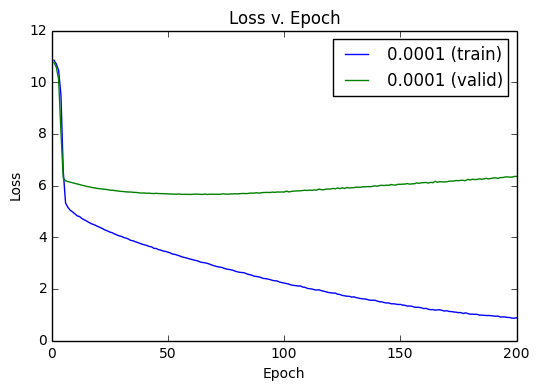

In [3]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][1], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][2], label=str(k) + ' (valid)')
plt.title('Loss v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Perplexity vs. Epoch

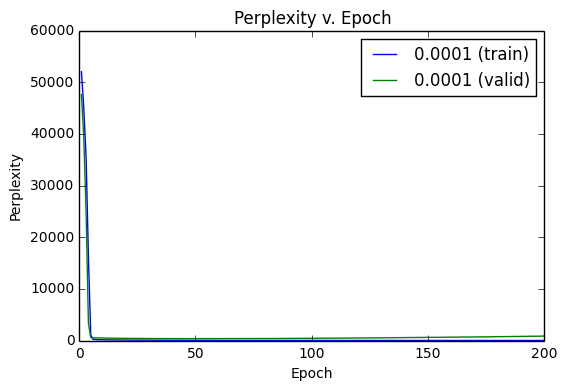

In [4]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][3], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][4], label=str(k) + ' (valid)')
plt.title('Perplexity v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.legend()
plt.show()

### Generations

In [5]:
def print_sample(sample, best_bleu=None):
    enc_input = ' '.join([w for w in sample['encoder_input'].split(' ') if w != '<pad>'])
    gold = ' '.join([w for w in sample['gold'].split(' ') if w != '<mask>'])
    print('Input: '+ enc_input + '\n')
    print('Gend: ' + sample['generated'] + '\n')
    print('True: ' + gold + '\n')
    if best_bleu is not None:
        cbm = ' '.join([w for w in best_bleu['best_match'].split(' ') if w != '<mask>'])
        print('Closest BLEU Match: ' + cbm + '\n')
        print('Closest BLEU Score: ' + str(best_bleu['best_score']) + '\n')
    print('\n')
    

In [6]:
for i, sample in enumerate(report['train_samples']):
    print_sample(sample, report['best_bleu_matches_train'][i] if 'best_bleu_matches_train' in report else None)

Input:  yakitori 焼き鳥

Gend:  <beg> preheat oven to 350 degrees f ( 175 degrees c ) . <step> in a large skillet over medium - high heat . add runner

True:  1 place the almond flour , salt , and butter into an electric beater with a paddle attachment and <end>

Closest BLEU Match:  preheat oven to 350 degrees f ( 175 degrees c ) . <step> in a large skillet <end>

Closest BLEU Score: 63.1660821942



Input:  perfect baked rice with herbs and veggies

Gend:  <beg> preheat oven to 350 degrees f ( 175 degrees c ) . <step> in a large skillet over medium - high heat . add runner

True:  preheat oven to 350 degrees . <step> cut up waffles into bite size pieces . think of them as croutons and that is <end>

Closest BLEU Match:  preheat oven to 350 degrees f ( 175 degrees c ) . <step> in a large skillet <end>

Closest BLEU Score: 63.1660821942



Input:  rajma ( kidney bean curry )

Gend:  <beg> preheat oven to 350 degrees f ( 175 degrees c ) . <step> in a large skillet over medium - high heat .

In [7]:
for i, sample in enumerate(report['valid_samples']):
    print_sample(sample, report['best_bleu_matches_valid'][i] if 'best_bleu_matches_valid' in report else None)

Input:  <mask> <mask> <mask> <mask> <mask> <mask> <mask> <mask> <mask> <mask>

Gend:  <beg> preheat oven to 350 degrees f ( 175 degrees c ) . <step> in a large skillet over medium - high heat . add runner

True:  in a food processor , pulse 1 bun until fine crumbs form ( you should have about 1 / 4 cup ) <end>

Closest BLEU Match:  preheat oven to 350 degrees f ( 175 degrees c ) . <step> in a large skillet <end>

Closest BLEU Score: 63.1660821942



Input:  <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2>

Gend:  <beg> preheat oven to 350 degrees f ( 175 degrees c ) . <step> in a large skillet over medium - high heat . add runner

True:  put it all in a large pot . cover , bring to the boil and simmer for a few minutes until all the <end>

Closest BLEU Match:  preheat oven to 350 degrees f ( 175 degrees c ) . <step> in a large skillet <end>

Closest BLEU Score: 63.1660821942



Input:  <UNK2> <mask> <mask> <mask> <mask> <mask> <UNK2> <mask> <UNK2> <mask>

Gend:  <b

In [8]:
for i, sample in enumerate(report['test_samples']):
    print_sample(sample, report['best_bleu_matches_test'][i] if 'best_bleu_matches_test' in report else None)

Input:  peanut butter jelly ice cream

Gend:  <beg> preheat oven to 350 degrees f ( 175 degrees c ) . <step> in a large skillet over medium - high heat . add runner

True:  to make the jelly <step> simply blend the strawberries , sweetner and chia seeds together until thick and smooth . leave to the side for

Closest BLEU Match:  preheat oven to 350 degrees f ( 175 degrees c ) . <step> in a large skillet <end>

Closest BLEU Score: 63.1660821942



Input:  butternut squash risotto

Gend:  <beg> preheat oven to 350 degrees f ( 175 degrees c ) . <step> in a large skillet over medium - high heat . add runner

True:  combine 2 cups squash and 2 1 / 2 cups water in a saucepan ; bring to a boil . reduce <end>

Closest BLEU Match:  preheat oven to 350 degrees f ( 175 degrees c ) . <step> in a large skillet <end>

Closest BLEU Score: 63.1660821942



Input:  chili dog casserole

Gend:  <beg> preheat oven to 350 degrees f ( 175 degrees c ) . <step> in a large skillet over medium - high heat . ad

### BLEU Analysis

In [9]:
def print_bleu(blue_struct):
    print 'Overall Score: ', blue_struct['score'], '\n'
    print '1-gram Score: ', blue_struct['components']['1']
    print '2-gram Score: ', blue_struct['components']['2']
    print '3-gram Score: ', blue_struct['components']['3']
    print '4-gram Score: ', blue_struct['components']['4']

In [10]:
# Training Set BLEU Scores
print_bleu(report['train_bleu'])

Overall Score:  5.1 

1-gram Score:  21.4
2-gram Score:  8.6
3-gram Score:  3
4-gram Score:  1.2


In [11]:
# Validation Set BLEU Scores
print_bleu(report['valid_bleu'])

Overall Score:  4.59 

1-gram Score:  17.6
2-gram Score:  6.9
3-gram Score:  3
4-gram Score:  1.2


In [12]:
# Test Set BLEU Scores
print_bleu(report['test_bleu'])

Overall Score:  10.36 

1-gram Score:  25.3
2-gram Score:  10.3
3-gram Score:  7.1
4-gram Score:  6.2


In [13]:
# All Data BLEU Scores
print_bleu(report['combined_bleu'])

Overall Score:  6.94 

1-gram Score:  21.4
2-gram Score:  8.6
3-gram Score:  4.4
4-gram Score:  2.9


### N-pairs BLEU Analysis

This analysis randomly samples 1000 pairs of generations/ground truths and treats them as translations, giving their BLEU score. We can expect very low scores in the ground truth and high scores can expose hyper-common generations

In [14]:
# Training Set BLEU n-pairs Scores
print_bleu(report['n_pairs_bleu_train'])

Overall Score:  100 

1-gram Score:  100
2-gram Score:  100
3-gram Score:  100
4-gram Score:  100


In [15]:
# Validation Set n-pairs BLEU Scores
print_bleu(report['n_pairs_bleu_valid'])

Overall Score:  100 

1-gram Score:  100
2-gram Score:  100
3-gram Score:  100
4-gram Score:  100


In [17]:
# Test Set n-pairs BLEU Scores
print_bleu(report['n_pairs_bleu_test'])

Overall Score:  100 

1-gram Score:  100
2-gram Score:  100
3-gram Score:  100
4-gram Score:  100


In [18]:
# Combined n-pairs BLEU Scores
print_bleu(report['n_pairs_bleu_all'])

Overall Score:  100 

1-gram Score:  100
2-gram Score:  100
3-gram Score:  100
4-gram Score:  100


In [19]:
# Ground Truth n-pairs BLEU Scores
print_bleu(report['n_pairs_bleu_gold'])

Overall Score:  4.37 

1-gram Score:  23.7
2-gram Score:  7
3-gram Score:  2.7
4-gram Score:  0.8


### Alignment Analysis

This analysis computs the average Smith-Waterman alignment score for generations, with the same intuition as N-pairs BLEU, in that we expect low scores in the ground truth and hyper-common generations to raise the scores

In [20]:
print 'Average (Train) Generated Score: ', report['average_alignment_train']
print 'Average (Valid) Generated Score: ', report['average_alignment_valid']
print 'Average (Test) Generated Score: ', report['average_alignment_test']
print 'Average (All) Generated Score: ', report['average_alignment_all']
print 'Average Gold Score: ', report['average_alignment_gold']

Average (Train) Generated Score:  119
Average (Valid) Generated Score:  119
Average (Test) Generated Score:  119
Average (All) Generated Score:  119
Average Gold Score:  14.7238095238
